LINEAR REGRESSION MODEL REPRESENTING OUR REALITY





Our dataset is on different aspects of our reality, in which there are four dependent variables and one independent variables. The dependent variables are noisy. The goal is create a linear regression model using Ordinary Least Square method as the fitting method, and also use regularization to ensure that the resultant model does not overfit to the dataset and also capture the noise and hence the model can't be used in a general term to predict any of the functions that connote our reality. 


We have another dataset, comprising of 50 ideal functions that are less noisy, it is a goal of the project, that after fitting, four ideal functions are to be selected from the 50 ideal functions based on how they minimize the sum of all y-deviation squared (least square), we assumed that this deviation is the deviation between the ideal function and each of the training dataset functions y1, y2, y3, y4. And we determined the four ideal function by picking the function with the least sum of deviation between it and the four training dataset dependent variables.


The final goal of the project is to map each selected ideal function to the test dataset based on the criteria that the existing maximum deviation of predicted values from the training dataset must not exceed the largest deviation between the ideal functions and training dataset by a square root of 2.

DATA WRANGLING

In [1]:
from data_exploration.data_wrangler import DataWrangler

data_wrangler = DataWrangler("train.csv")
print("Shape of our training dataset is: ", data_wrangler.shape_of_data())
print(
    "The summary statistic of our training dataset is given as: ",
    data_wrangler.summary_statistics(),
)
missing_values = data_wrangler.find_missing_values()
print("The columns with missing values in our dataset are ", missing_values)
if missing_values is not None:
    data_wrangler.fill_missing_values()  # fills missing values with the mean value of the column with the missing value
duplicated_rows = data_wrangler.duplicated_rows()
print("The duplicated rows in our dataset include: ", duplicated_rows)
if duplicated_rows is not None:
    data_wrangler.drop_duplicated()
outliers_y1 = data_wrangler.find_outliers(data_wrangler.dataframe.loc[:, "y1"])
outliers_y2 = data_wrangler.find_outliers(data_wrangler.dataframe.loc[:, "y2"])
outliers_y3 = data_wrangler.find_outliers(data_wrangler.dataframe.loc[:, "y3"])
outliers_y4 = data_wrangler.find_outliers(data_wrangler.dataframe.loc[:, "y4"])
print("Outlier in column y1 ", outliers_y1)
print("Outlier in column y2 ", outliers_y2)
print("Outlier in column y3 ", outliers_y3)
print("Outlier in column y4 ", outliers_y4)
if outliers_y1 is not []:
    new_df = data_wrangler.handle_outliers("y1")
    print("The new state of y1 after handling outliers is: ", new_df.loc[:, "y1"])
if outliers_y2 is not []:
    new_df = data_wrangler.handle_outliers("y2")
    print("The new state of y2 after handling outliers is: ", new_df.loc[:, "y2"])
if outliers_y3 is not []:
    new_df = data_wrangler.handle_outliers("y3")
    print("The new state of y3 after handling outliers is: ", new_df.loc[:, "y3"])
if outliers_y4 is not []:
    new_df = data_wrangler.handle_outliers("y4")
    print("The new state of y4 after handling outliers is: ", new_df.loc[:, "y4"])

Shape of our training dataset is:  (400, 5)
The summary statistic of our training dataset is given as:                 x          y1          y2           y3          y4
count  400.00000  400.000000  400.000000   400.000000  400.000000
mean    -0.05000   -0.010927    0.000935   -20.047418    1.871548
std     11.56143    0.741270    0.731270  3038.164316   34.682339
min    -20.00000   -1.470697   -1.432097 -8020.184000  -57.798700
25%    -10.02500   -0.658506   -0.592108 -1017.915225  -27.990803
50%     -0.05000    0.030718   -0.022523    -0.149552    1.789057
75%      9.92500    0.639899    0.605907   987.705420   31.824766
max     19.90000    1.379600    1.424345  7900.731000   61.907253
The columns with missing values in our dataset are  x     0
y1    0
y2    0
y3    0
y4    0
dtype: int64
The duplicated rows in our dataset include:  0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 4

To further confirm that the outliers that we handled in y3 via Log transformation are truly outliers, we use a box plot to view the distribution of the y1, y2, y3, and y4 and inspect the whiskers of the plot for an indication of outlier.

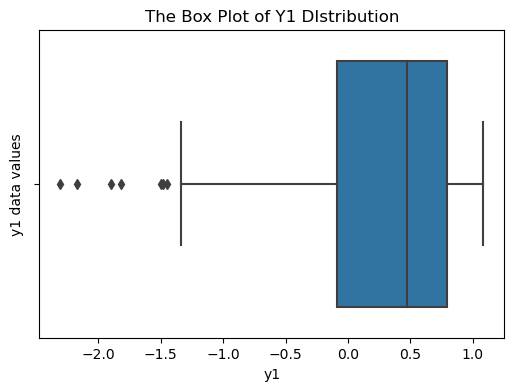

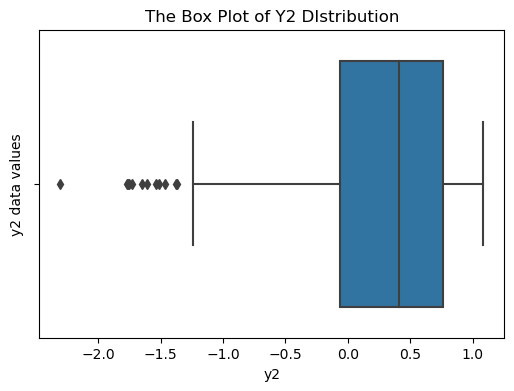

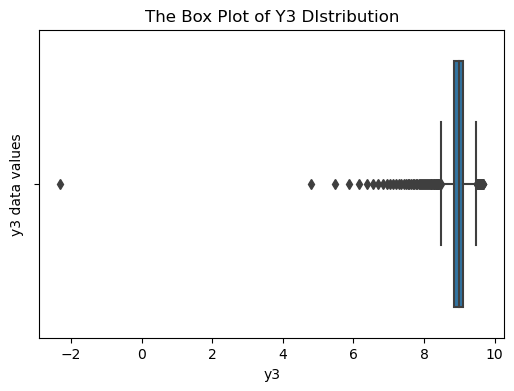

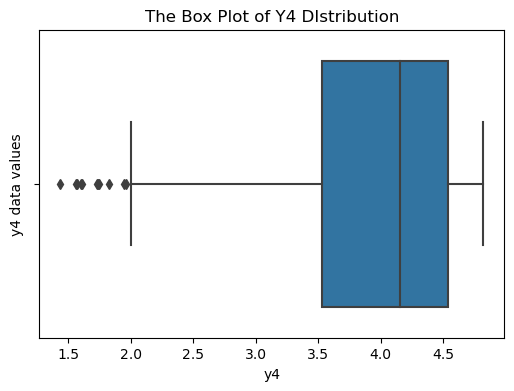

In [2]:
from data_exploration.visualization import Visualization

visualization = Visualization("The Box Plot of Y1 DIstribution", "y1", "y1 data values")
visualization.box_plot(data_wrangler.dataframe.loc[:, "y1"])
visualization = Visualization("The Box Plot of Y2 DIstribution", "y2", "y2 data values")
visualization.box_plot(data_wrangler.dataframe.loc[:, "y2"])
visualization = Visualization("The Box Plot of Y3 DIstribution", "y3", "y3 data values")
visualization.box_plot(data_wrangler.dataframe.loc[:, "y3"])
visualization = Visualization("The Box Plot of Y4 DIstribution", "y4", "y4 data values")
visualization.box_plot(data_wrangler.dataframe.loc[:, "y4"])

From the visualization above, it is obvious that all data columns have outliers, but our code didn't list them for y1, y2, and y4 because values failed within the standard we employed for determining outliers, hence no outlier was detected as opposed to what the visualization is showing us. Considering column y3, the presence of outliers is very much, hence, we are sure that the transformation must have to been done when we ran the handle outliers function.
So, we are going to run the handle outlier function again, and update our dataframe with the resulting dataframe.

In [3]:
if outliers_y1 is not []:
    new_df = data_wrangler.handle_outliers("y1")
    data_wrangler.dataframe = new_df
    print(
        "The new state of y1 after handling outliers is: ",
        data_wrangler.dataframe.loc[:, "y1"],
    )
if outliers_y2 is not []:
    new_df = data_wrangler.handle_outliers("y2")
    data_wrangler.dataframe = new_df
    print(
        "The new state of y2 after handling outliers is: ",
        data_wrangler.dataframe.loc[:, "y2"],
    )
if outliers_y3 is not []:
    new_df = data_wrangler.handle_outliers("y3")
    data_wrangler.dataframe = new_df
    print(
        "The new state of y3 after handling outliers is: ",
        data_wrangler.dataframe.loc[:, "y3"],
    )
if outliers_y4 is not []:
    new_df = data_wrangler.handle_outliers("y4")
    data_wrangler.dataframe = new_df
    print(
        "The new state of y4 after handling outliers is: ",
        data_wrangler.dataframe.loc[:, "y4"],
    )

The new state of y1 after handling outliers is:  0      0.122952
1      0.725622
2      0.913329
3      0.258596
4      0.720335
         ...   
395    1.205284
396    1.135340
397    1.197979
398    1.229814
399    1.185858
Name: y1, Length: 400, dtype: float64
The new state of y2 after handling outliers is:  0      1.200092
1      1.173223
2      1.211897
3      1.118972
4      1.154038
         ...   
395    0.628042
396    0.623592
397    0.533995
398    0.616306
399    0.894301
Name: y2, Length: 400, dtype: float64
The new state of y3 after handling outliers is:  0      2.011271
1      2.678431
2      2.724416
3      2.750277
4      2.768185
         ...   
395    2.966359
396    2.966738
397    2.967120
398    2.967503
399    2.967888
Name: y3, Length: 400, dtype: float64
The new state of y4 after handling outliers is:  0      1.849511
1      1.868662
2      1.870279
3      1.875218
4      1.876349
         ...   
395    2.274664
396    2.275189
397    2.275836
398    2.275396
39

Now we replot the box plot and check if we still see our whiskers indicating the presence of an outlier

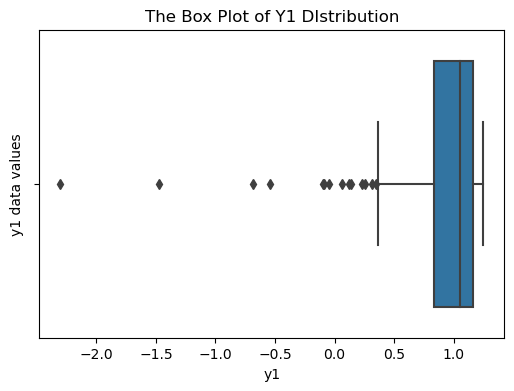

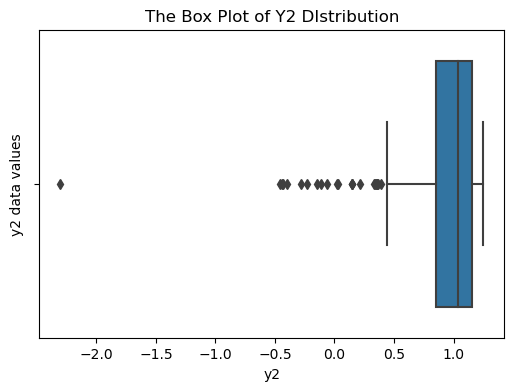

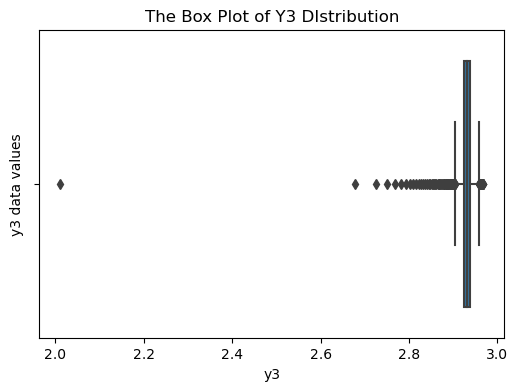

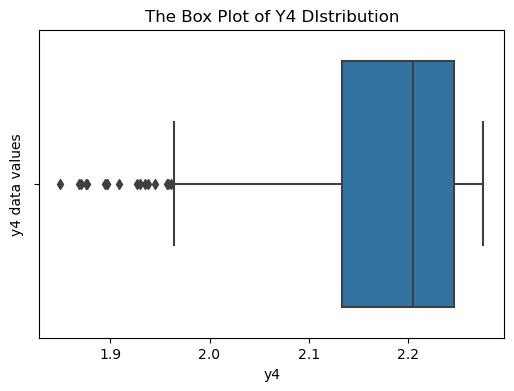

In [4]:
visualization = Visualization("The Box Plot of Y1 DIstribution", "y1", "y1 data values")
visualization.box_plot(data_wrangler.dataframe.loc[:, "y1"])
visualization = Visualization("The Box Plot of Y2 DIstribution", "y2", "y2 data values")
visualization.box_plot(data_wrangler.dataframe.loc[:, "y2"])
visualization = Visualization("The Box Plot of Y3 DIstribution", "y3", "y3 data values")
visualization.box_plot(data_wrangler.dataframe.loc[:, "y3"])
visualization = Visualization("The Box Plot of Y4 DIstribution", "y4", "y4 data values")
visualization.box_plot(data_wrangler.dataframe.loc[:, "y4"])

Nothing improved in the visualization but definitely the standard that values below (q1-1.5*iqr) and above (q3 + 1.5*iqr) are outliers will definitely report that there are no outliers anymore in y3. Note: q1 is the first quartile, q3 is the third quartile and iqr is the interquartile range.

In [5]:
outliers_y3 = data_wrangler.find_outliers(data_wrangler.dataframe.loc[:, "y3"])
print("Outlier in column y3 ", outliers_y3)

Outlier in column y3  [2.011271115907748, 2.6784309091504697, 2.72441568690483, 2.750276876208114, 2.7681846960264127, 2.7818252929385, 2.79271921438647, 2.8018630759210597, 2.809587791244053, 2.8163863703351746, 2.8223311884562494, 2.8276706759569405, 2.8325306916987274, 2.8369245191402555, 2.840946200698165, 2.8446848096721493, 2.8481422290425162, 2.8513392044350065, 2.854342243655092, 2.857160687263209, 2.8598103022492416, 2.862300048223933, 2.8646526991471273, 2.8668981034298886, 2.869011650904721, 2.871020960979756, 2.8729500680751903, 2.874801516154494, 2.876544077971118, 2.878231421421534, 2.8798470344910716, 2.881386684973822, 2.8828752988096156, 2.8842883589413506, 2.885660641050449, 2.8869902816081487, 2.8882670185282033, 2.889488849512482, 2.890682004323651, 2.891829965470662, 2.8929396520602033, 2.8940094647408463, 2.895051699165159, 2.896056930197104, 2.8970291826806167, 2.897975522679493, 2.8988885832660967, 2.8997790454310115, 2.9006406196575845, 2.901478040209728, 2.902

The above reveals that log transforming does not handle our outlier and so we still maintain the distribution of our dataset, we assume that these may not be actually outliers, and continue with visualization. Advanced techniques that may be employed to verify certainly if these are outliers are the Isolation Forests, Local Outlier Factor (LOF) or One-Class SVM, these are above the scope of this project.

VISUALIZATION

Below are the distribution of our different dependent variables: y1, y2, y3, y4.

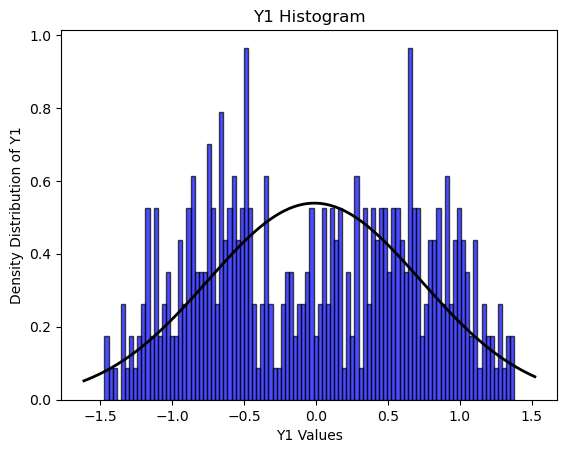

In [6]:
data_wrangler = DataWrangler("train.csv")
df = data_wrangler.dataframe
visualization = Visualization("Y1 Histogram", "Y1 Values", "Density Distribution of Y1")
visualization.histogram(100, df.loc[:, "y1"])

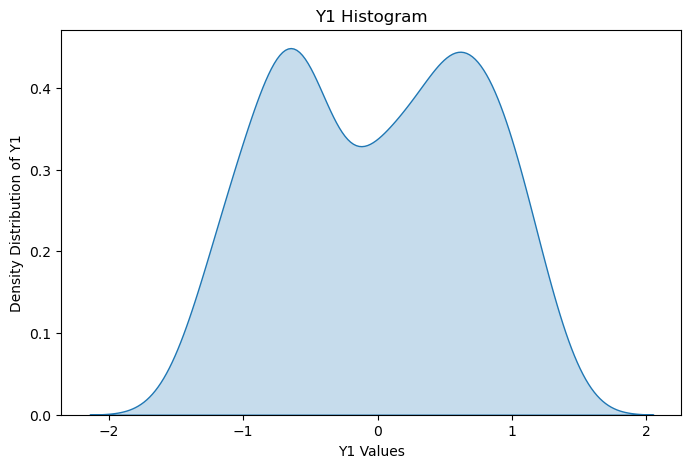

In [7]:
visualization.kdeplot(df.loc[:, "y1"])

The plot above shows us that our y1 column follows somewhat normal distribution, hence we can do linear regression modelling with the dataset column y1. We also observed that it is bimodal. We repeat for y2, y3, and y4.

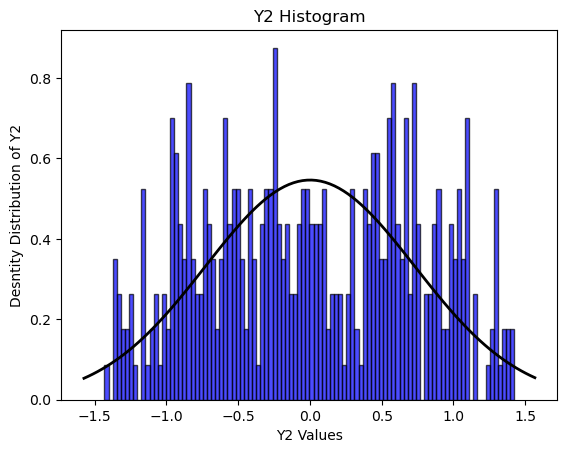

In [8]:
visualization = Visualization(
    "Y2 Histogram", "Y2 Values", "Desntity Distribution of Y2"
)
visualization.histogram(100, df.loc[:, "y2"])

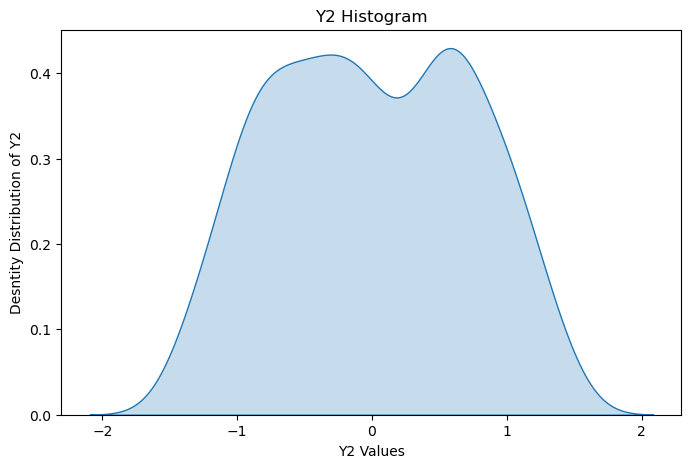

In [9]:
visualization.kdeplot(df.loc[:, "y2"])

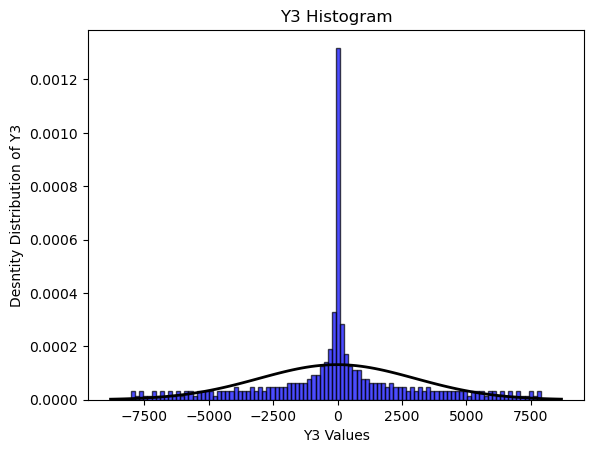

In [10]:
visualization = Visualization(
    "Y3 Histogram", "Y3 Values", "Desntity Distribution of Y3"
)
visualization.histogram(100, df.loc[:, "y3"])

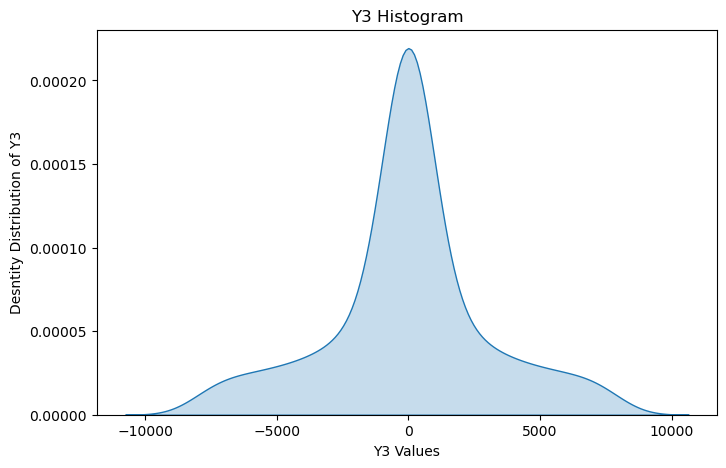

In [11]:
visualization.kdeplot(df.loc[:, "y3"])

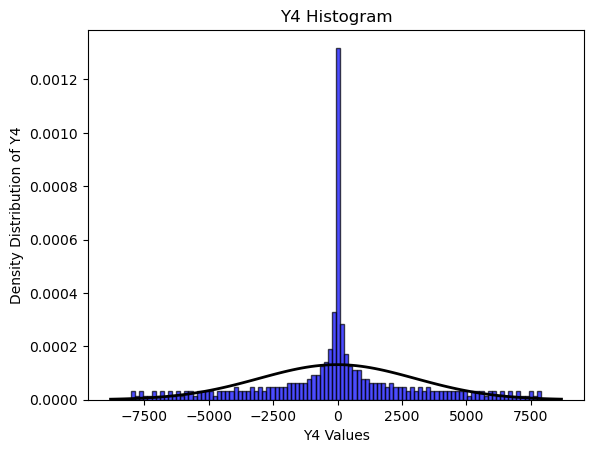

In [12]:
visualization = Visualization("Y4 Histogram", "Y4 Values", "Density Distribution of Y4")
visualization.histogram(100, df.loc[:, "y3"])

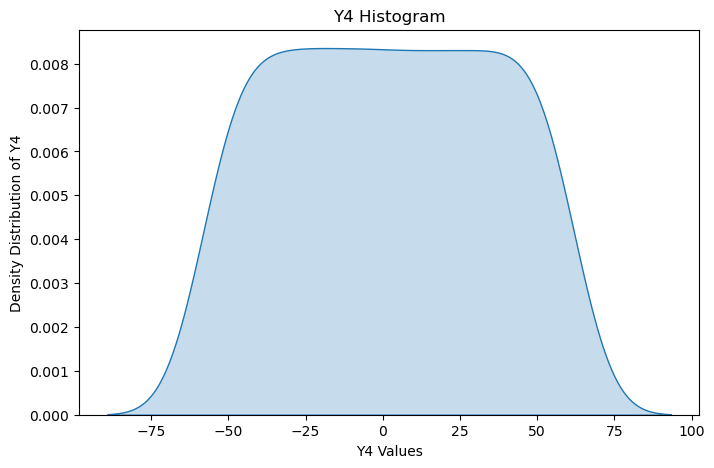

In [13]:
visualization.kdeplot(df.loc[:, "y4"])

All our training dataset dependent variables are normally distributed but with some noise, so we can use linear regression for modelling the dataset, but we must adopt a technique to avoid the model fitting to the noise in the dataset, so we would employ regularization in our fitting.

RELATIONSHIP BETWEEN INDEPENDENT VARIABLE AND DEPENDENT VARIABLES

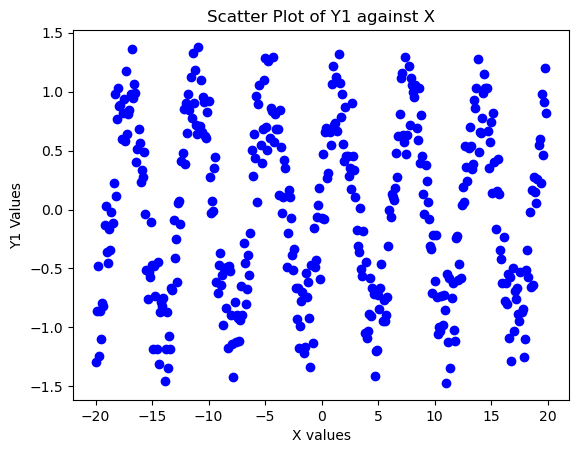

In [14]:
visualization = Visualization("Scatter Plot of Y1 against X", "X values", "Y1 Values")
visualization.scatter_plot(df.loc[:, "x"], df.loc[:, "y1"])

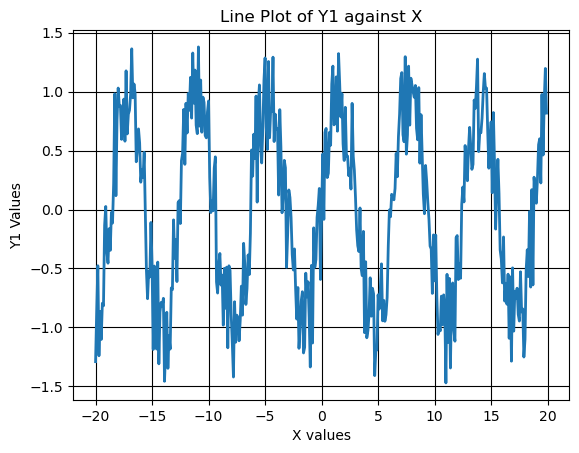

In [15]:
visualization = Visualization("Line Plot of Y1 against X", "X values", "Y1 Values")
visualization.line_plot(df.loc[:, "x"], df.loc[:, "y1"], 2)

From the scatter plot and line plot above, the relationship between the independent variable x and the dependent variable y1 is obviously a sinusoidal function, but it has a lot of noise.

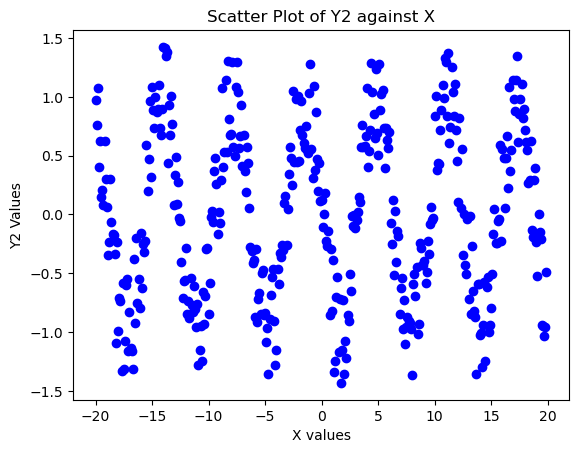

In [16]:
visualization = Visualization("Scatter Plot of Y2 against X", "X values", "Y2 Values")
visualization.scatter_plot(df.loc[:, "x"], df.loc[:, "y2"])

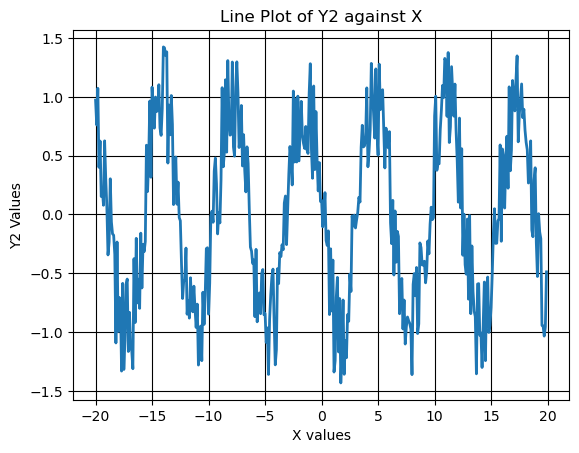

In [17]:
visualization = Visualization("Line Plot of Y2 against X", "X values", "Y2 Values")
visualization.line_plot(df.loc[:, "x"], df.loc[:, "y2"], 2)

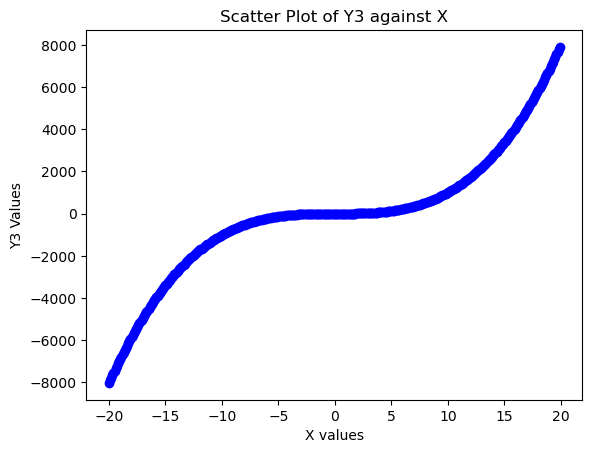

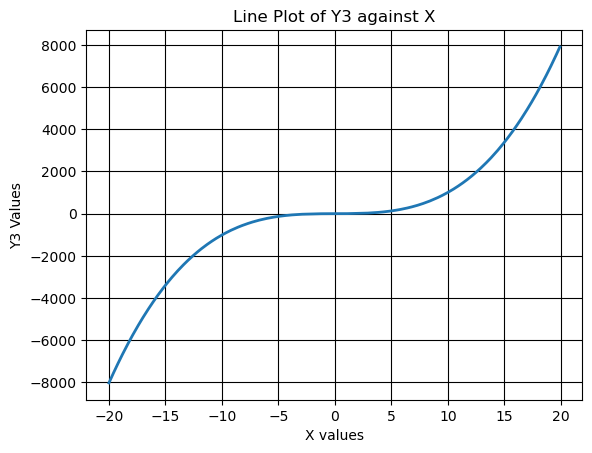

In [18]:
visualization = Visualization("Scatter Plot of Y3 against X", "X values", "Y3 Values")
visualization.scatter_plot(df.loc[:, "x"], df.loc[:, "y3"])
visualization = Visualization("Line Plot of Y3 against X", "X values", "Y3 Values")
visualization.line_plot(df.loc[:, "x"], df.loc[:, "y3"], 2)

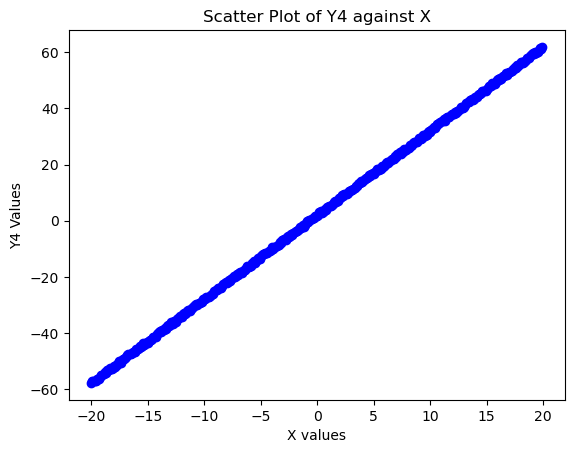

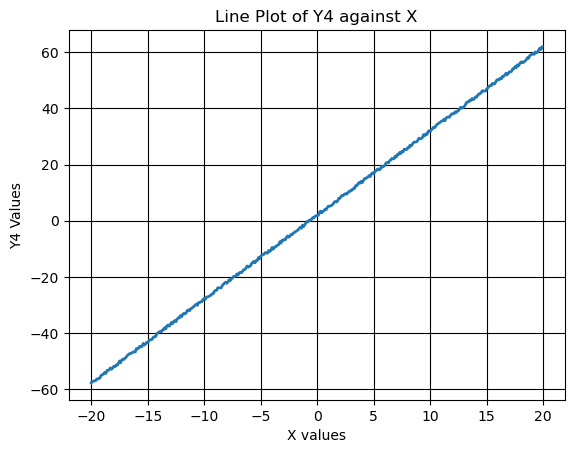

In [19]:
visualization = Visualization("Scatter Plot of Y4 against X", "X values", "Y4 Values")
visualization.scatter_plot(df.loc[:, "x"], df.loc[:, "y4"])
visualization = Visualization("Line Plot of Y4 against X", "X values", "Y4 Values")
visualization.line_plot(df.loc[:, "x"], df.loc[:, "y4"], 2)

Same relationship for dependent variable y2. y3 is partially sinusoidal and y4 is perfect linear graph. 


CONCLUSION


y4 can be perfectly fitted with a linear regression but y1, y2, and y3 may not be that so easy, we would need to add polynomial features in order to capture the existing complexity that isn't linear, at least a degree of 8.

VISUALIZATION OF RELATIONSHIP EXISTING BETWEEN VARIABLES IN OUR DATASET

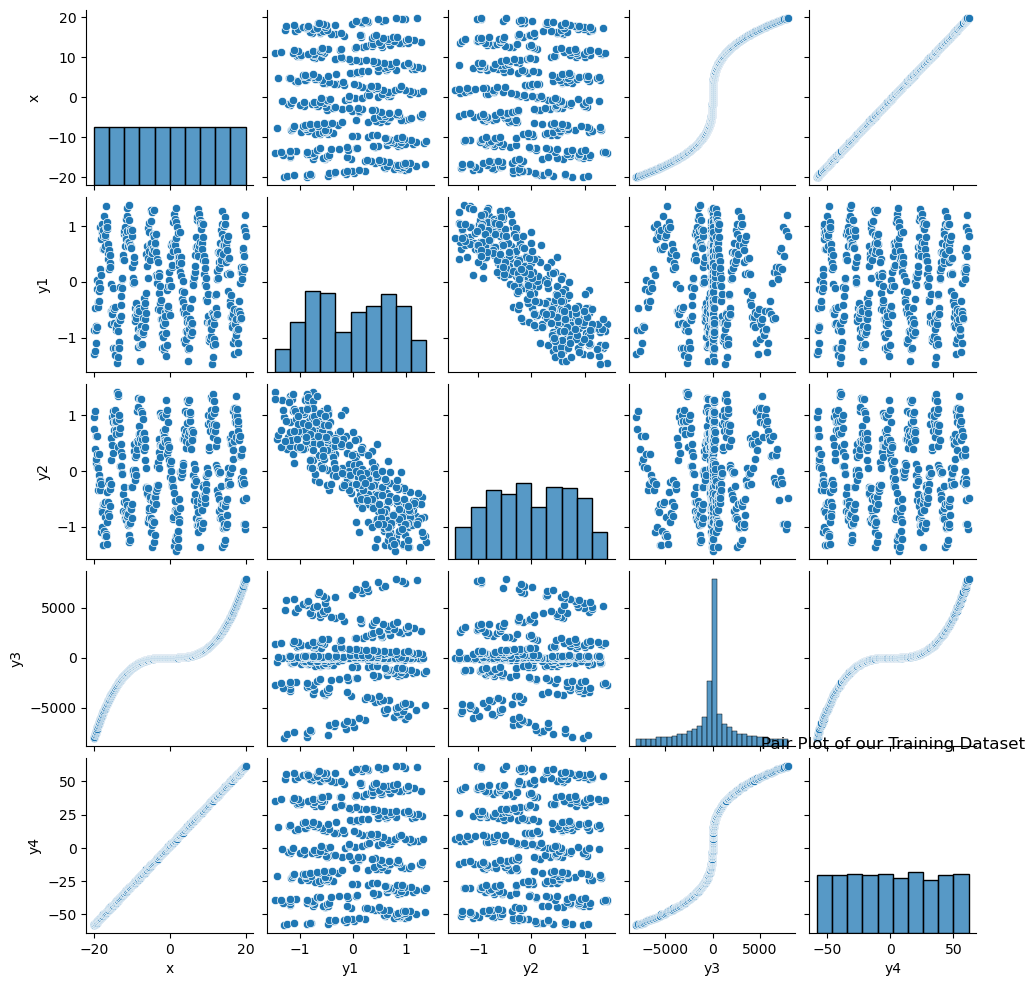

In [20]:
visualization = Visualization("Pair Plot of our Training Dataset", " ", "")
visualization.pairplot(df, 2)

Some of the dependent variables from the pairplot above, are indicating that they have a relationship with the other.

OLS ASSUMPTIONS

The different OLS Assumptions include:
    1. Linearity
    2. Normality
    3. Heterocedasticity
    4. Independence

In [21]:
from data_exploration.ols_assumptions import OLSAssumptions

add_polynomial_term = [
    True,
    True,
    True,
    True 
]  # indicates if a polynomial term should be added to capture nonlinear complexity
# y4 plot against x showed a straight line graph which a linear regression model can fit perfectly except y1, y2, and y3.
# Hence, we set that a polynomial term should be added to y1, y2, and y3.
ols_assumption = OLSAssumptions("train.csv", add_polynomial_term)
result = ols_assumption.check_heterocedasticity()
if result[0] == False:
    print(
        "variance of the residuals of y1 is "
        + "constant across the range of predictor values"
    )
if result[1] == False:
    print(
        "variance of the residuals of y2 is "
        + "constant across the range of predictor values"
    )
if result[2] == False:
    print(
        "variance of the residuals of y3 is "
        + "constant across the range of predictor values"
    )
if result[3] == False:
    print(
        "variance of the residuals of y4 is "
        + "constant across the range of predictor values"
    )

variance of the residuals of y1 is constant across the range of predictor values
variance of the residuals of y2 is constant across the range of predictor values
variance of the residuals of y3 is constant across the range of predictor values
variance of the residuals of y4 is constant across the range of predictor values


Not all functions are homocedastic.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


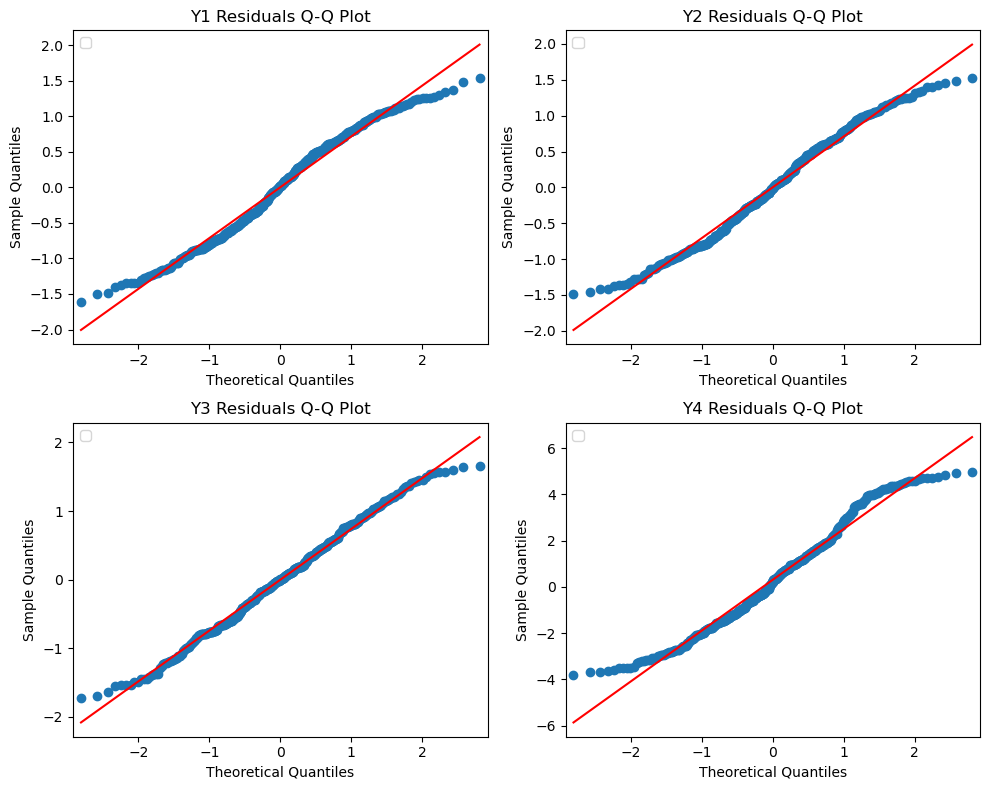

In [22]:
result = ols_assumption.check_normality()

In [23]:
if result[0] == False:
    print(
        "Y1 residuals are normally distributed, inspect the Q-Q plot visually "
        + "to be sure that it's a straight line graph."
    )
if result[1] == False:
    print(
        "Y2 residuals are normally distributed, inspect the Q-Q plot visually "
        + "to be sure that it's a straight line graph."
    )
if result[2] == False:
    print(
        "Y3 residuals are normally distributed, inspect the Q-Q plot visually "
        + "to be sure that it's a straight line graph."
    )
if result[3] == False:
    print(
        "Y4 residuals are normally distributed, inspect the Q-Q plot visually "
        + "to be sure that it's a straight line graph."
    )

Y1 residuals are normally distributed, inspect the Q-Q plot visually to be sure that it's a straight line graph.
Y2 residuals are normally distributed, inspect the Q-Q plot visually to be sure that it's a straight line graph.
Y4 residuals are normally distributed, inspect the Q-Q plot visually to be sure that it's a straight line graph.


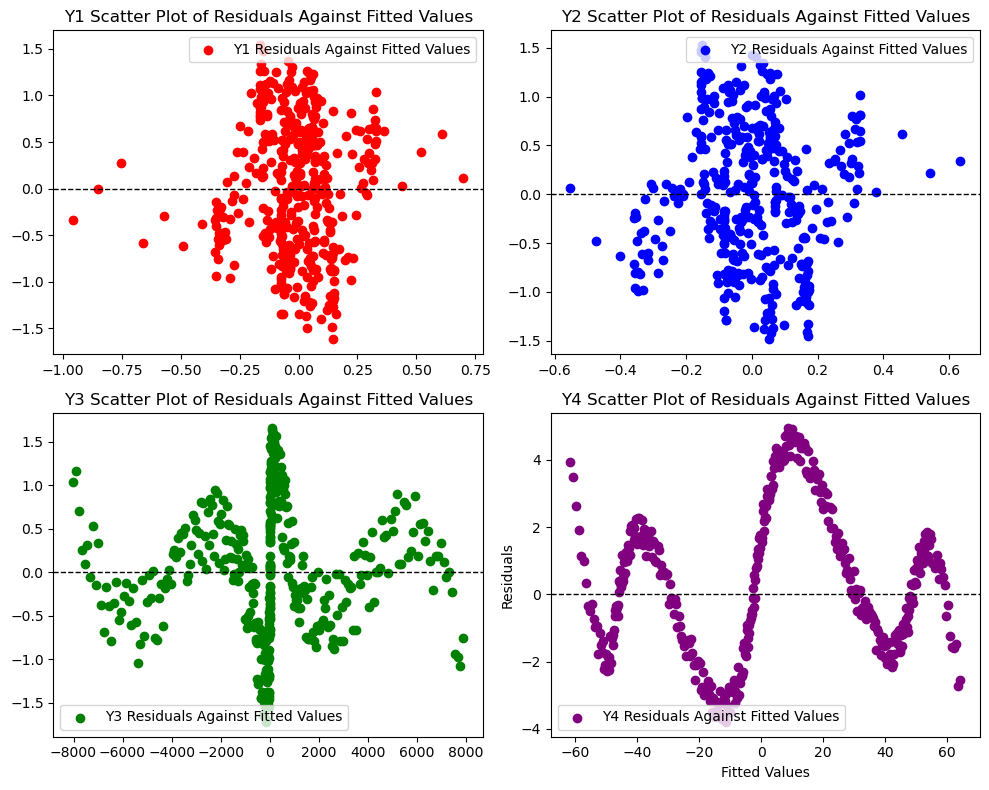

An unexpected error occurred res must be a results instance from a linear model.


In [24]:
result = ols_assumption.check_linearity()
if result[0] == False:
    print(
        "Y1 Scatter Plot of Fitted Values Against Residuals"
        + " might be showing a pattern, inspect visually "
        + "to be sure."
    )
if result[1] == False:
    print(
        "Y2 Scatter Plot of Fitted Values Against Residuals"
        + " might be showing a pattern, inspect visually "
        + "to be sure."
    )
if result[2] == False:
    print(
        "Y3 Scatter Plot of Fitted Values Against Residuals"
        + " might be showing a pattern, inspect visually "
        + "to be sure."
    )
if result[3] == False:
    print(
        "Y4 Scatter Plot of Fitted Values Against Residuals"
        + " might be showing a pattern, inspect visually "
        + "to be sure."
    )

y3 and y4 are showing some pattern but for y1 and y2 isn't showing a pattern.

According to (Jacobs and Flatt, 2019), no dataset have all the above features satisfied, for example, y4 is a perfect straight line graph yet, the linearity test from the graph is failed but y1, y2, y3 passes after a polynomial feature was added.

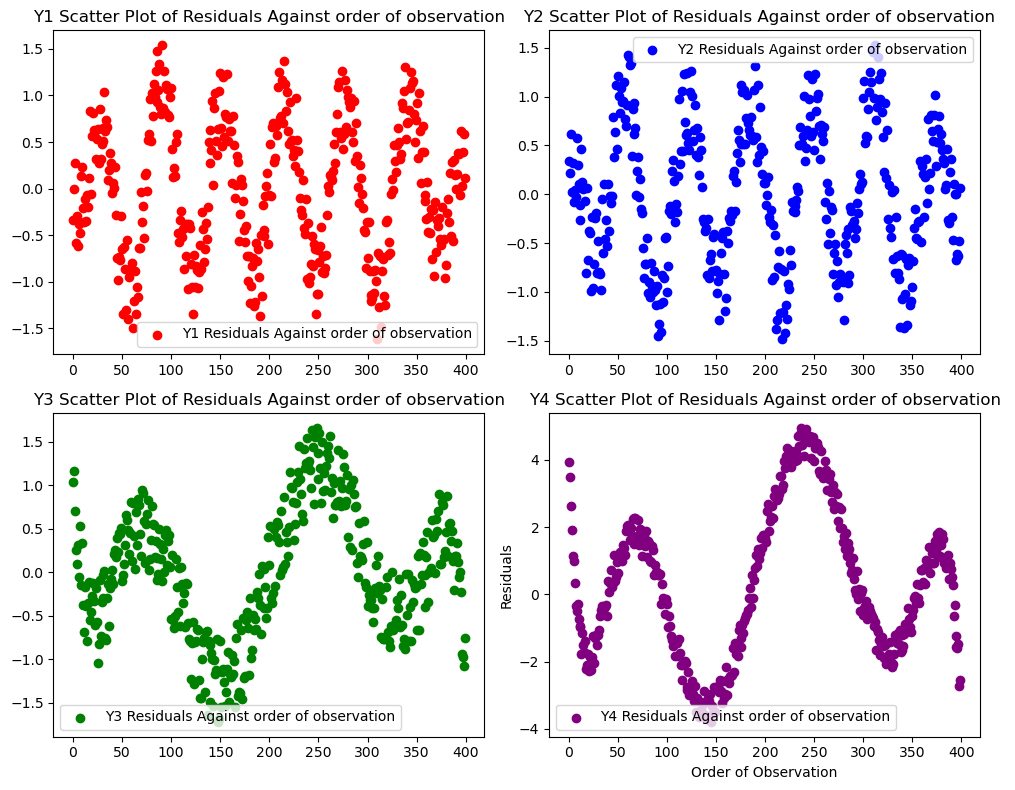

In [25]:
result = ols_assumption.check_independence()

In [26]:
if result[0] is True:
    print(
        "Y1 Scatter Plot of residuals against order of observation"
        + " might not show a pattern, inspect visually "
        + "to be sure."
    )
if result[1] is True:
    print(
        "Y2 Scatter Plot of residuals against order of observation"
        + " might not show a pattern, inspect visually "
        + "to be sure."
    )
if result[2] is True:
    print(
        "Y3 Scatter Plot of residuals against order of observation"
        + " might not show a pattern, inspect visually "
        + "to be sure."
    )
if result[3] is True:
    print(
        "Y4 Scatter Plot of residuals against order of observation"
        + " might not show a pattern, inspect visually "
        + "to be sure."
    )

Obviously, all the tests were not passed, but each dependent variable has one or two of the test passed that a linear regression model can be fitted on it, so we approach with (Jacobs and Flatt, 2019) opinion, and fit a linear regression model on the data, but we try to add polynomial features to capture non-linearity complexities.

VISUALIZATION OF X-VALUES AGAINST PREDICTED VALUES FOR Y1, Y2, Y3, AND Y4

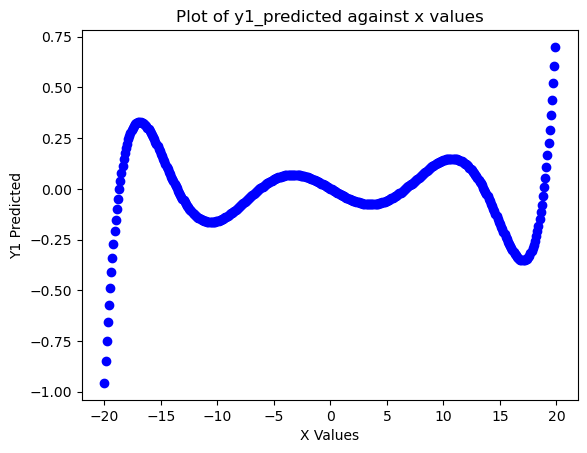

In [27]:
from utility.dataframe_utility import DataFrameUtility

dataframe_utility = DataFrameUtility("predictions.csv")
dataframe_utility.load_data()
visualization = Visualization(
    "Plot of y1_predicted against x values", "X Values", "Y1 Predicted"
)
visualization.scatter_plot(
    dataframe_utility.dataframe.loc[:, "x"],
    dataframe_utility.dataframe.loc[:, "y1"],
)

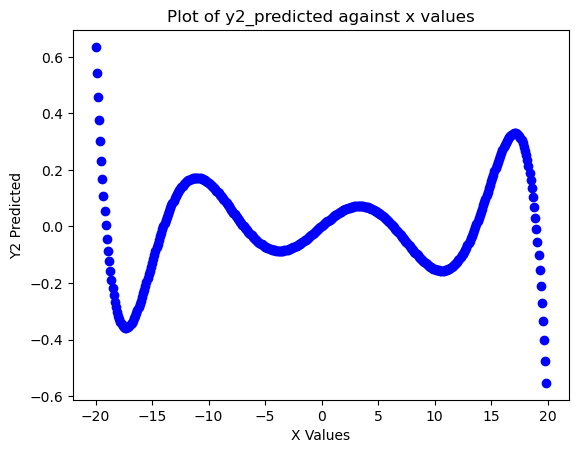

In [28]:
visualization = Visualization(
    "Plot of y2_predicted against x values", "X Values", "Y2 Predicted"
)
visualization.scatter_plot(
    dataframe_utility.dataframe.loc[:, "x"],
    dataframe_utility.dataframe.loc[:, "y2"],
)

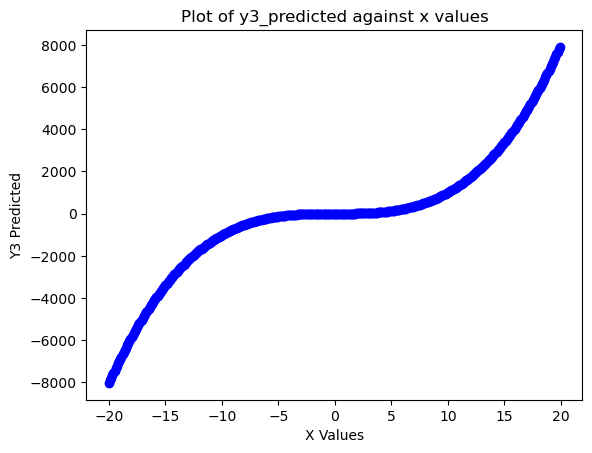

In [29]:
visualization = Visualization(
    "Plot of y3_predicted against x values", "X Values", "Y3 Predicted"
)
visualization.scatter_plot(
    dataframe_utility.dataframe.loc[:, "x"],
    dataframe_utility.dataframe.loc[:, "y3"],
)

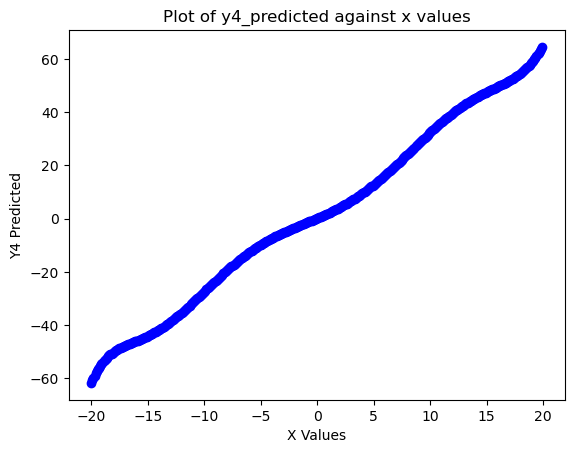

In [30]:
visualization = Visualization(
    "Plot of y4_predicted against x values", "X Values", "Y4 Predicted"
)
visualization.scatter_plot(
    dataframe_utility.dataframe.loc[:, "x"],
    dataframe_utility.dataframe.loc[:, "y4"],
)

EVALUATION OF MODEL PREDICTION ABILITY USING TEST DATA

In [31]:
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import numpy as np
import pandas as pd

dataframe_utility = DataFrameUtility("test.csv")
dataframe_utility.load_data()
poly = PolynomialFeatures(degree=8, include_bias=True)
x_poly = poly.fit_transform(
    np.array(dataframe_utility.dataframe.loc[:, "x"]).reshape(-1, 1)
)
# done to avoid having a zero intercept
x_with_constant = sm.add_constant(x_poly)
x_with_constant2 = sm.add_constant(np.array(dataframe_utility.dataframe.loc[:, "x"]))
predicted_values_y1 = ols_assumption.model[0].predict(x_with_constant)
predicted_values_y2 = ols_assumption.model[1].predict(x_with_constant)
predicted_values_y3 = ols_assumption.model[2].predict(x_with_constant)
predicted_values_y4 = ols_assumption.model[3].predict(x_with_constant)
pred_df = pd.DataFrame(
    data={
        "model_y1_test_pred": predicted_values_y1,
        "model_y2_test_pred": predicted_values_y2,
        "model_y3_test_pred": predicted_values_y3,
        "model_y4_test_pred": predicted_values_y4,
    }
)
dataframe_utility.write_to_file(pred_df, "model_test_pred.csv")

VISUALIZATION OF TEST DATASET - Y AGAINST X VALUES

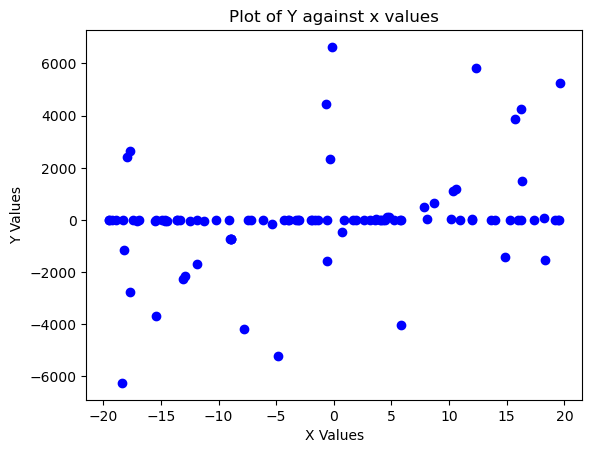

In [32]:
visualization = Visualization("Plot of Y against x values", "X Values", "Y Values")
visualization.scatter_plot(
    dataframe_utility.dataframe.loc[:, "x"], dataframe_utility.dataframe.loc[:, "y"]
)

Obviously, our test dataset have a constant relationship between y and x, with only few points deviating.

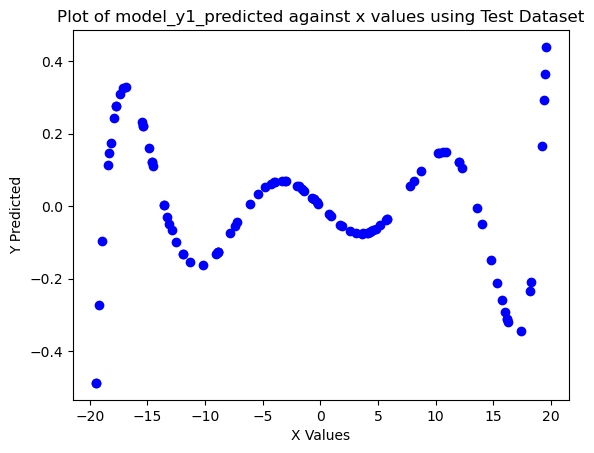

In [33]:
visualization = Visualization(
    "Plot of model_y1_predicted against x values using Test Dataset",
    "X Values",
    "Y Predicted",
)
visualization.scatter_plot(dataframe_utility.dataframe.loc[:, "x"], predicted_values_y1)

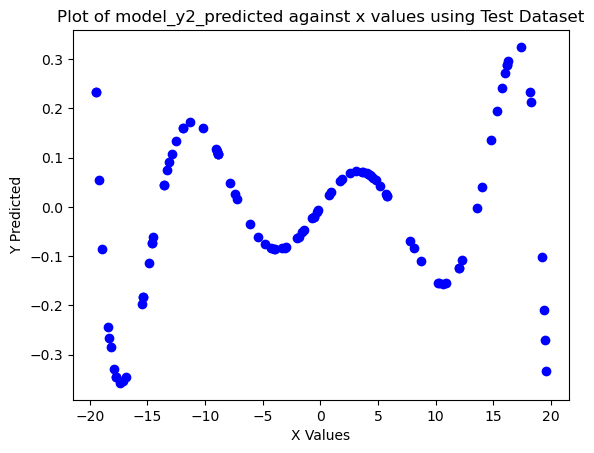

In [34]:
visualization = Visualization(
    "Plot of model_y2_predicted against x values using Test Dataset",
    "X Values",
    "Y Predicted",
)
visualization.scatter_plot(dataframe_utility.dataframe.loc[:, "x"], predicted_values_y2)

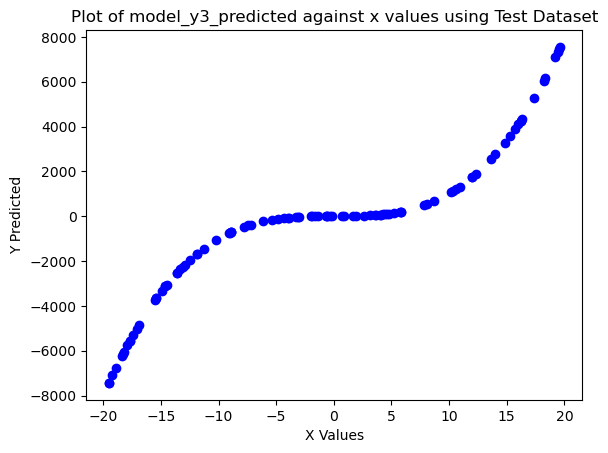

In [35]:
visualization = Visualization(
    "Plot of model_y3_predicted against x values using Test Dataset",
    "X Values",
    "Y Predicted",
)
visualization.scatter_plot(dataframe_utility.dataframe.loc[:, "x"], predicted_values_y3)

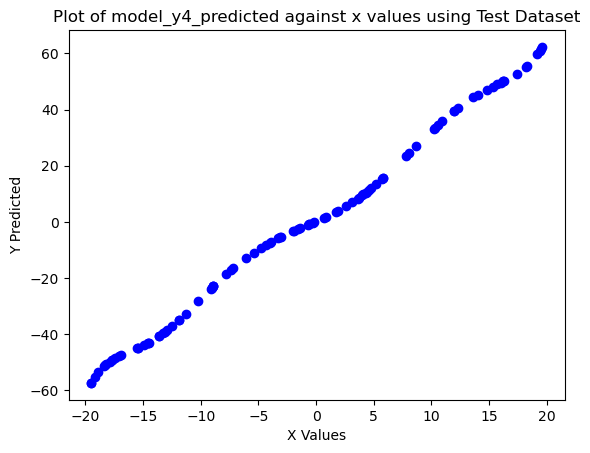

In [36]:
visualization = Visualization(
    "Plot of model_y4_predicted against x values using Test Dataset",
    "X Values",
    "Y Predicted",
)
visualization.scatter_plot(dataframe_utility.dataframe.loc[:, "x"], predicted_values_y4)

Obviously, we have succeeded in producing models that are less noisy and that predict values correctly and also takes the ideal shape expected of them. We assume that our regularized fitting and addition of polynomial terms to capture complexities worked, though not perfect but it worked to a manageable extent we proceed to determining ideal functions.

EVALUATION OF MODEL USING RESIDUAL ANALYSIS AND THE FOUR BASIC LINEAR REGRESSION ASSUMPTIONS

In [37]:
from model_evaluation.evaluate_model import EvaluateModel

evaluate_model = EvaluateModel("train.csv", "ideal.csv", "test.csv")

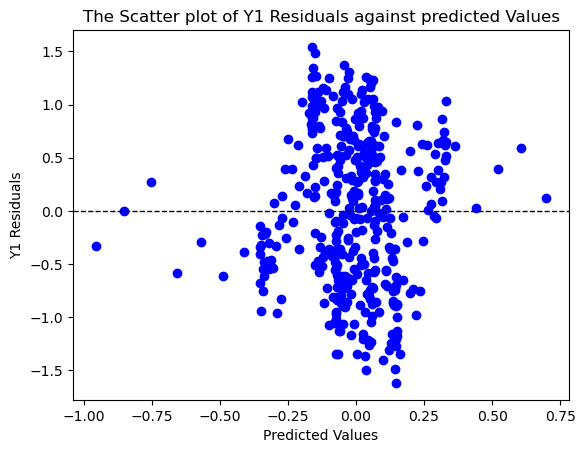

In [38]:
dataframe_utility = DataFrameUtility("residuals.csv")
dataframe_utility.load_data()
res_df = dataframe_utility.dataframe
dataframe_utility = DataFrameUtility("predictions.csv")
dataframe_utility.load_data()
pred_df = dataframe_utility.dataframe
visualization = Visualization("The Scatter plot of Y1 Residuals against predicted Values", "Predicted Values", "Y1 Residuals")
visualization.scatter_plot(pred_df.loc[:, 'y1'], res_df.loc[:,'res1'], True)


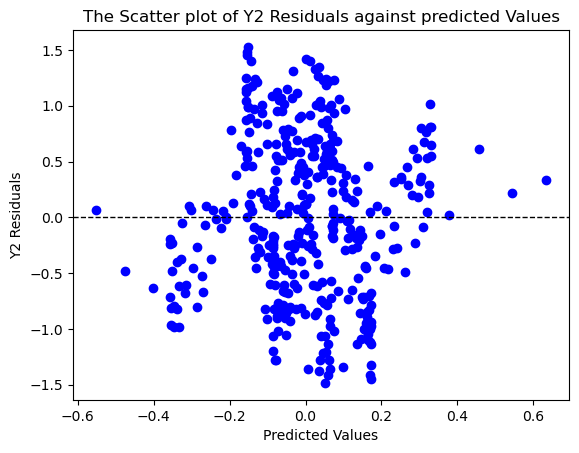

In [39]:
visualization = Visualization("The Scatter plot of Y2 Residuals against predicted Values", "Predicted Values", "Y2 Residuals")
visualization.scatter_plot(pred_df.loc[:, 'y2'], res_df.loc[:,'res2'], True)

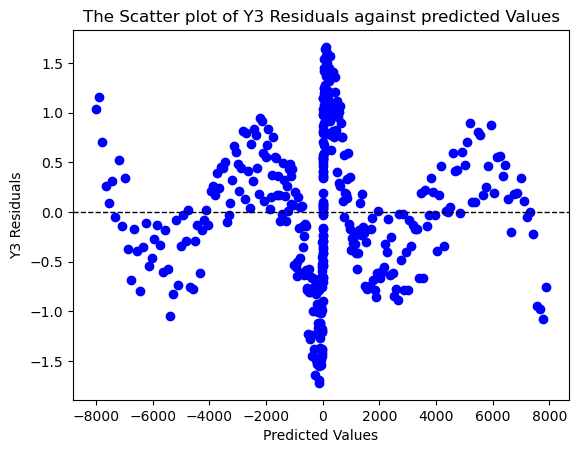

In [40]:
visualization = Visualization("The Scatter plot of Y3 Residuals against predicted Values", "Predicted Values", "Y3 Residuals")
visualization.scatter_plot(pred_df.loc[:, 'y3'], res_df.loc[:,'res3'], True)

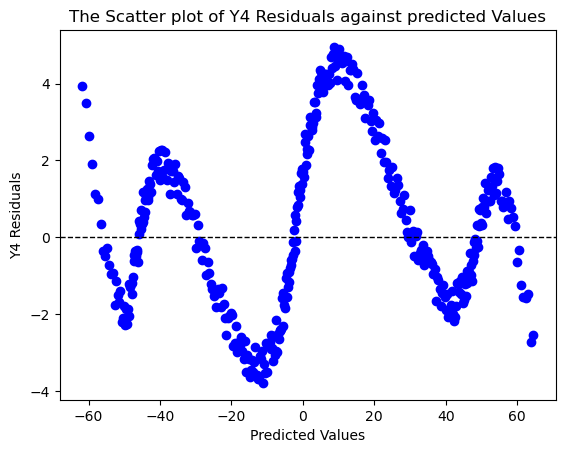

In [41]:
visualization = Visualization("The Scatter plot of Y4 Residuals against predicted Values", "Predicted Values", "Y4 Residuals")
visualization.scatter_plot(pred_df.loc[:, 'y4'], res_df.loc[:,'res4'], True)

As exposed by Wallstreetmojo Team(n. d.), the model is of best fit if the residuals are randomly scattered around the zero line, which is an indication that the models resulting from the fit are the best fit. We evaluate further by using the OLSAssumptions class to test for the Linear Regression assumptions on our predicted dataset.

In [42]:
ols_assumptions = OLSAssumptions()
result = ols_assumptions.check_heterocedasticity(False)
if result[0] == False:
    print(
        "variance of the residuals of y1 is "
        + "constant across the range of predictor values"
    )
if result[1] == False:
    print(
        "variance of the residuals of y2 is "
        + "constant across the range of predictor values"
    )
if result[2] == False:
    print(
        "variance of the residuals of y3 is "
        + "constant across the range of predictor values"
    )
if result[3] == False:
    print(
        "variance of the residuals of y4 is "
        + "constant across the range of predictor values"
    )

variance of the residuals of y1 is constant across the range of predictor values
variance of the residuals of y2 is constant across the range of predictor values
variance of the residuals of y3 is constant across the range of predictor values
variance of the residuals of y4 is constant across the range of predictor values


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


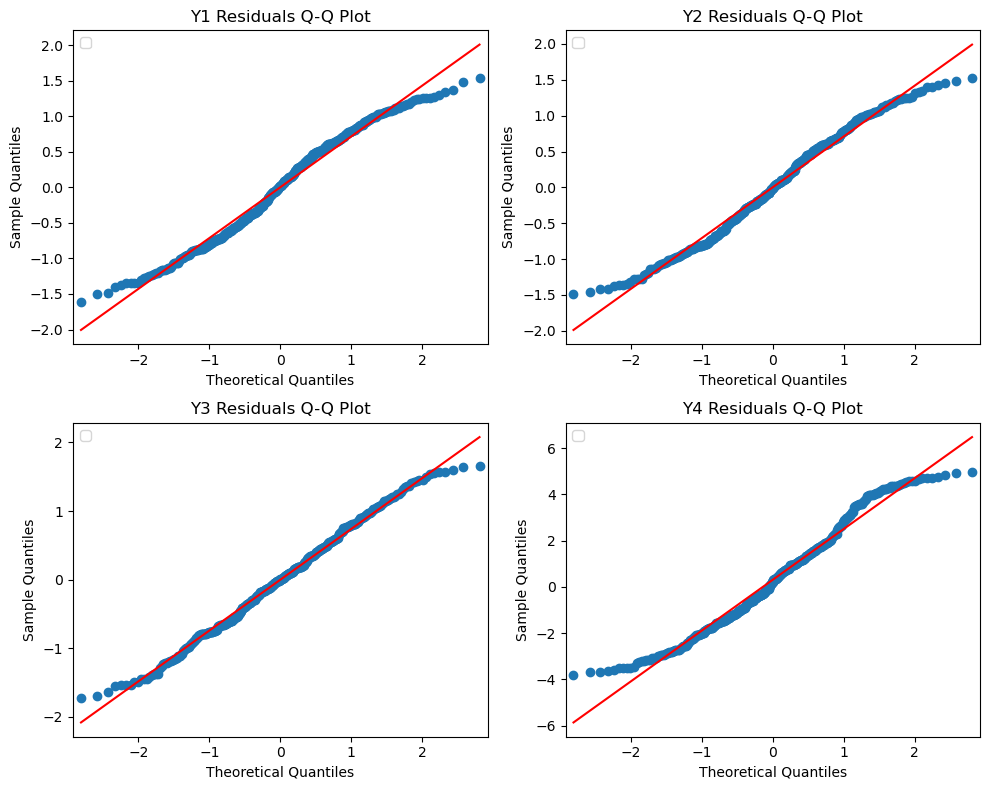

Y1 residuals are normally distributed, inspect the Q-Q plot visually to be sure that it's a straight line graph.
Y2 residuals are normally distributed, inspect the Q-Q plot visually to be sure that it's a straight line graph.
Y4 residuals are normally distributed, inspect the Q-Q plot visually to be sure that it's a straight line graph.


In [43]:
result = ols_assumptions.check_normality(False)
if result[0] == False:
    print(
        "Y1 residuals are normally distributed, inspect the Q-Q plot visually "
        + "to be sure that it's a straight line graph."
    )
if result[1] == False:
    print(
        "Y2 residuals are normally distributed, inspect the Q-Q plot visually "
        + "to be sure that it's a straight line graph."
    )
if result[2] == False:
    print(
        "Y3 residuals are normally distributed, inspect the Q-Q plot visually "
        + "to be sure that it's a straight line graph."
    )
if result[3] == False:
    print(
        "Y4 residuals are normally distributed, inspect the Q-Q plot visually "
        + "to be sure that it's a straight line graph."
    )

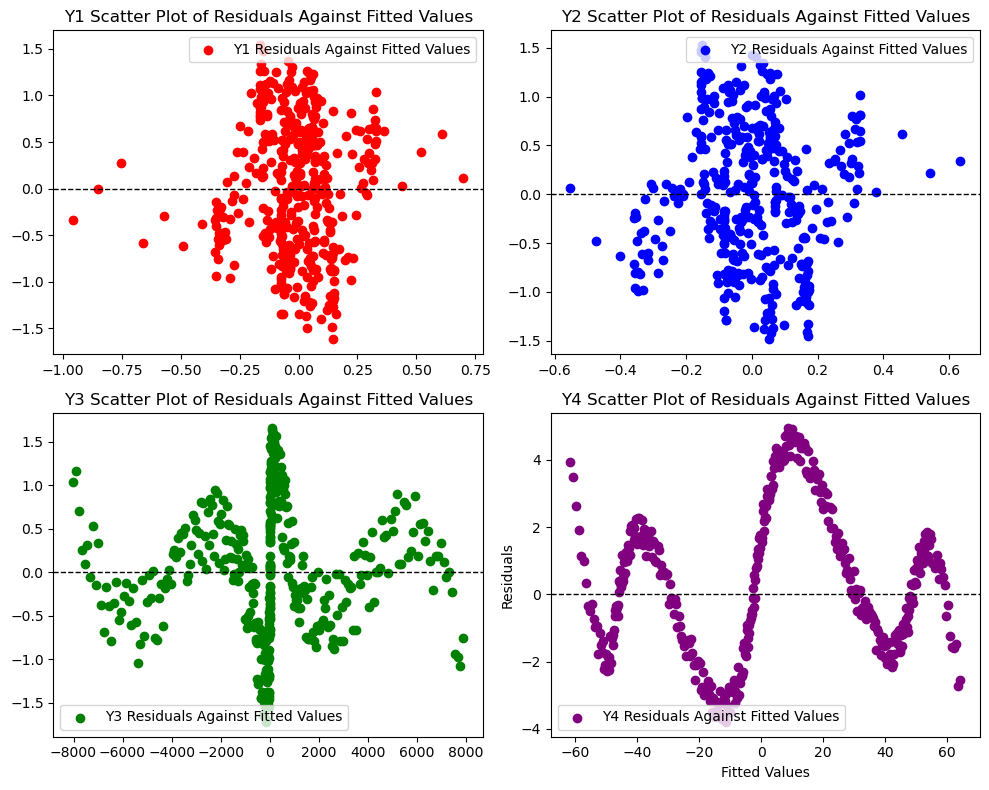

In [44]:
result = ols_assumption.check_linearity(False)
if result[0] == False:
    print(
        "Y1 Scatter Plot of Fitted Values Against Residuals"
        + " might be showing a pattern, inspect visually "
        + "to be sure."
    )
if result[1] == False:
    print(
        "Y2 Scatter Plot of Fitted Values Against Residuals"
        + " might be showing a pattern, inspect visually "
        + "to be sure."
    )
if result[2] == False:
    print(
        "Y3 Scatter Plot of Fitted Values Against Residuals"
        + " might be showing a pattern, inspect visually "
        + "to be sure."
    )
if result[3] == False:
    print(
        "Y4 Scatter Plot of Fitted Values Against Residuals"
        + " might be showing a pattern, inspect visually "
        + "to be sure."
    )

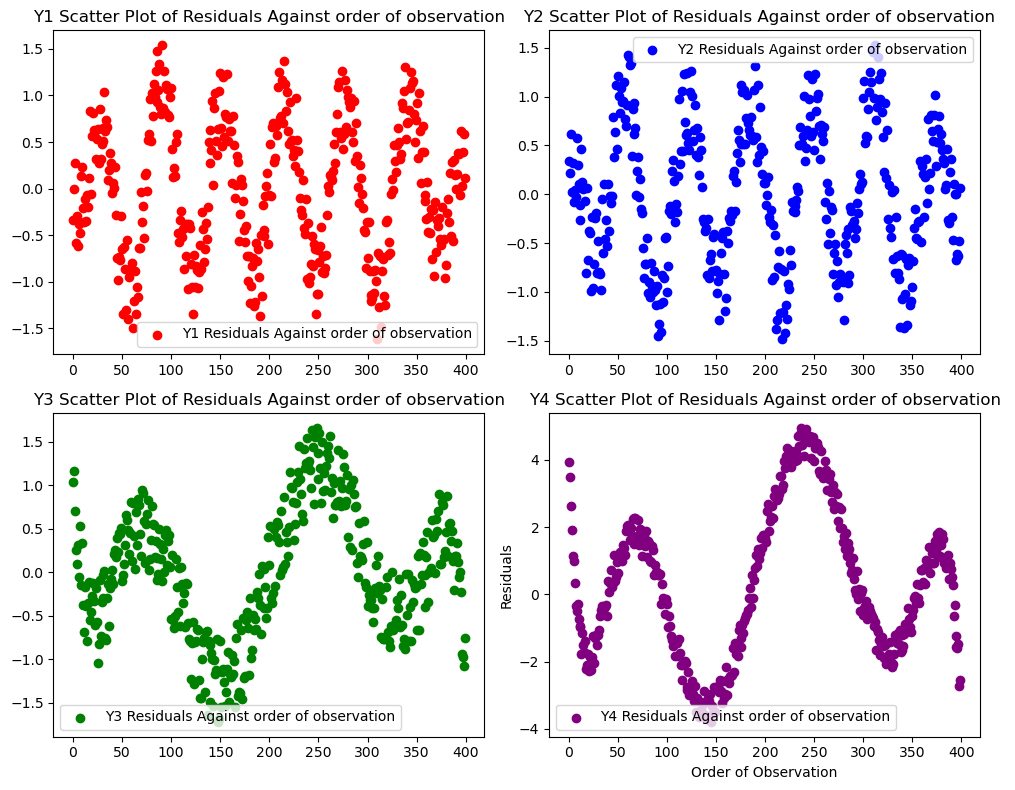

In [45]:
result = ols_assumptions.check_independence(False)
if result[0] is True:
    print(
        "Y1 Scatter Plot of residuals against order of observation"
        + " might not show a pattern, inspect visually "
        + "to be sure."
    )
if result[1] is True:
    print(
        "Y2 Scatter Plot of residuals against order of observation"
        + " might not show a pattern, inspect visually "
        + "to be sure."
    )
if result[2] is True:
    print(
        "Y3 Scatter Plot of residuals against order of observation"
        + " might not show a pattern, inspect visually "
        + "to be sure."
    )
if result[3] is True:
    print(
        "Y4 Scatter Plot of residuals against order of observation"
        + " might not show a pattern, inspect visually "
        + "to be sure."
    )

From the above plots, we conclude that our model is actually the best fit for the dataset, because the linear regression assumptions are still showing that the non-linearity property of the dataset.

DETERMINE IDEAL FUNCTIONS

In [46]:

print(
    "The Four selected ideal Functions out of the 50, based on how they minimize the deviation cost function is:",
    evaluate_model.four_ideal_func,
)

The Four selected ideal Functions out of the 50, based on how they minimize the deviation cost function is: ['y12', 'y20', 'y13', 'y41']


VISUALIZATION OF SELECTED IDEAL FUNCTION

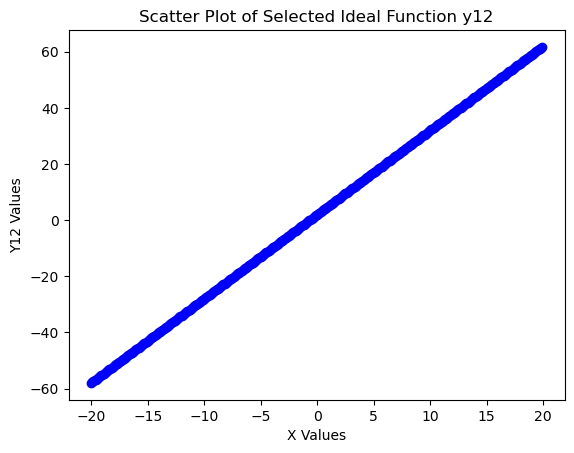

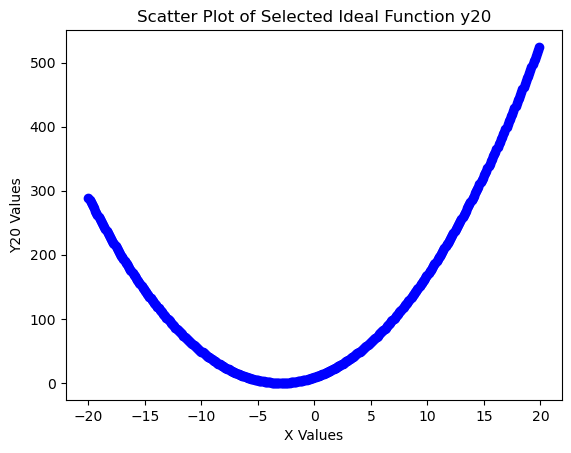

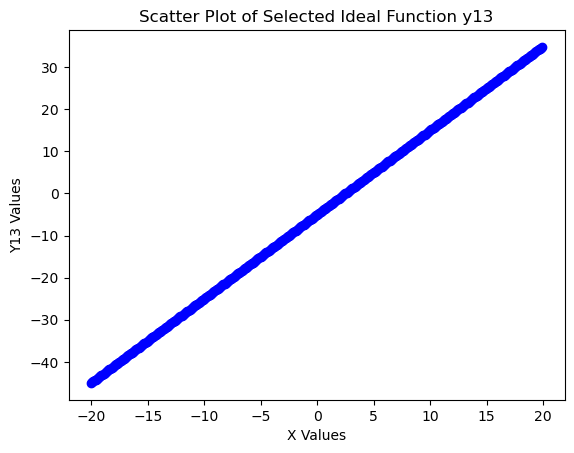

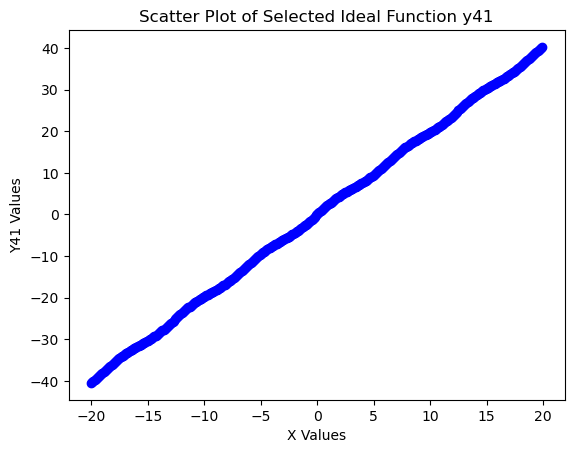

In [47]:
dataframe_utility = DataFrameUtility("selected_ideal.csv")
dataframe_utility.load_data()
col_x = evaluate_model.train_df.loc[:, "x"]
visualization = Visualization(
    "Scatter Plot of Selected Ideal Function y12", "X Values", "Y12 Values"
)
visualization.scatter_plot(col_x, dataframe_utility.dataframe.loc[:, "y12"])
visualization = Visualization(
    "Scatter Plot of Selected Ideal Function y20", "X Values", "Y20 Values"
)
visualization.scatter_plot(col_x, dataframe_utility.dataframe.loc[:, "y20"])
visualization = Visualization(
    "Scatter Plot of Selected Ideal Function y13", "X Values", "Y13 Values"
)
visualization.scatter_plot(col_x, dataframe_utility.dataframe.loc[:, "y13"])
visualization = Visualization(
    "Scatter Plot of Selected Ideal Function y41", "X Values", "Y41 Values"
)
visualization.scatter_plot(col_x, dataframe_utility.dataframe.loc[:, "y41"])

MAPPING OF IDEAL FUNCTIONS TO TEST DATASET

In [48]:
evaluate_model.compute_train_devia_from_ideal()
print(evaluate_model.ideal_train_devia)

[[15850766.935933063, 15378504.172407998, 14920273.677810615, 14473464.420284001, 14036928.491884563, 13610023.899944035, 13196148.129982304, 12789478.915900398, 12397730.503129449, 12012070.625325931, 11640514.458558649, 11277327.33182032, 10920931.469179438, 10576369.5986968, 10241524.932314653, 9912935.421682937, 9593791.663435, 9285326.930349236, 8983600.838740746, 8689877.77940722, 8404256.339459818, 8127531.218934295, 7858623.7006066535, 7595277.336855916, 7341569.706124109, 7095141.566787505, 6853894.548587422, 6618205.865668702, 6392732.767739445, 6171178.539418505, 5956223.715012298, 5748913.036795854, 5546335.488343734, 5352200.297105183, 5162125.45220913, 4976561.547350195, 4797272.629339453, 4624772.230949492, 4455588.483413506, 4292221.037769894, 4133889.749605025, 3980947.111463307, 3831792.438527702, 3687879.655118589, 3548724.8186977296, 3413435.295417177, 3283108.109435258, 3156328.270845444, 3034028.4176315307, 2915569.397567908, 2802112.6072786753, 2691235.3640621845

Above is a 2-D list that bears the deviation of each selected ideal function from the training dataset, for the 400 rows in the training dataset. The deviation was computed by finding the deviation of the selected ideal function in consideration from the training dataset y1, y2, y3, y4 for each row and squaring the deviation for y1, y2, y3, and y4 and summing them up and then dividing by 4 to normalize it to represent the deviation of just two functions, so it can stand on equal ground to be compared to existing maximum deviation of the calculated regression, which was computed by squaring the residuals of each model and summing them and normalizing it by dividing by 400 and picking the maximum deviation between the normalized deviation sum of y1, y2, y3 and y4.

In [49]:
evaluate_model.determine_max_deviation()
print(
    "The existing maximum deviation of the calculated regression is: ",
    evaluate_model.existing_max_devia,
)

The existing maximum deviation of the calculated regression is:  4.9280931546486535


In [50]:
print(evaluate_model.max)

[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [1], [2], [1], [1], [1], [1],

Above is a 2-D list that is showing the selected ideal function that is to mapped to each row of the training dataset, based on the criteria that it has the largest deviation value between it and the training dataset .
 

Where 0 = y12,
        1 = y20,
        2 = y13,
        3 = y41

In [51]:
evaluate_model.map_ideal()
evaluate_model.construct_mapping_df()

An unexpected error occurred ufunc 'add' did not contain a loop with signature matching types (dtype('<U8'), dtype('float64')) -> None


In [52]:
print("Mapping of Ideal Function to Test Data: ", evaluate_model.mapped)

Mapping of Ideal Function to Test Data:         x            y Delta_y12     Delta_y20     Delta_y13 Delta_y41  \
0   -4.0     1.044171      None           NaN  7.410344e+05      None   
1   19.6  5240.178700      None           NaN  2.612037e+06      None   
2   -7.2     2.063293      None           NaN  1.369278e+07      None   
3  -14.6   -43.106170      None           NaN  4.413433e+01      None   
4  -17.4    -1.217196      None           NaN  4.158579e+05      None   
..   ...          ...       ...           ...           ...       ...   
95  10.9    -0.647010      None  7.581647e+06           NaN      None   
96  -1.9    -2.322036      None  2.675393e+06           NaN      None   
97  19.5    -0.028896      None  4.017929e+04           NaN      None   
98  14.8 -1435.503500      None           NaN  1.411777e+07      None   
99  12.0    36.656208      None  1.218716e+03           NaN      None   

    Number_of_Ideal_Function  
0                          1  
1                   

In [53]:
from utility.sqlite3_utility import Sqlite3Utility

sqlite3_utility = Sqlite3Utility("train.csv")
sqlite3_utility.write("train")

In [54]:
sqlite3_utility = Sqlite3Utility("ideal.csv")
sqlite3_utility.write("ideal")

In [55]:
sqlite3_utility = Sqlite3Utility("test.csv")
sqlite3_utility.write("test")

In [56]:
sqlite3_utility = Sqlite3Utility("mapping.csv")
sqlite3_utility.write("mapping")

REFERENCES

Wallstreetmojo Team(n. d.) Residual Analysis. https://www.wallstreetmojo.com/residual-analysis

Jacobs R. L. and Flatt C. (2019). Principle Assumptions of Regression Analysis: Testing, Techniques and Statistical Reporting of Imperfect Data Sets. Advances in Developing Human Resources 2019, Vol. 2(4) 484-502.